# Group 1
# Covid-19 Exploratory Data Analysis 

In [1]:
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
plotly.offline.init_notebook_mode(connected=True)

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

import colorcet as cc

import math

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

## Loading data

In [2]:
population_df = pd.read_csv('./data/population.csv', thousands = ',')
average_rainfall_df = pd.read_csv('./data/average_rainfall.csv', thousands = ',')
average_temperature_df = pd.read_csv('./data/average_temperature.csv', thousands = ',')
gdp_df = pd.read_csv('./data/gdp.csv')
median_age_df = pd.read_csv('./data/median_age.csv', thousands = ',')
covid_19 = pd.read_csv('./data/owid-covid-data.csv', thousands = ',')

# Data preprocessing

## Covid 19 Dataset
### Filtering South East Asia countries

In [3]:
sea_countries = ['Brunei', 'Cambodia', 'Indonesia', 'Malaysia', 'Myanmar', 'Laos',
                           'Philippines', 'Singapore', 'Thailand', 'Timor', 'Vietnam']
covid_19= covid_19[covid_19['location'].isin(sea_countries)]
covid_19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
20776,BRN,Asia,Brunei,2020-03-09,1.0,1.0,NaN,NaN,NaN,NaN,...,2.0,30.9,NaN,2.7,75.86,0.838,NaN,NaN,NaN,NaN
20777,BRN,Asia,Brunei,2020-03-10,1.0,0.0,NaN,NaN,NaN,NaN,...,2.0,30.9,NaN,2.7,75.86,0.838,NaN,NaN,NaN,NaN
20778,BRN,Asia,Brunei,2020-03-11,11.0,10.0,NaN,NaN,NaN,NaN,...,2.0,30.9,NaN,2.7,75.86,0.838,NaN,NaN,NaN,NaN
20779,BRN,Asia,Brunei,2020-03-12,11.0,0.0,NaN,NaN,NaN,NaN,...,2.0,30.9,NaN,2.7,75.86,0.838,NaN,NaN,NaN,NaN
20780,BRN,Asia,Brunei,2020-03-13,37.0,26.0,NaN,NaN,NaN,NaN,...,2.0,30.9,NaN,2.7,75.86,0.838,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148452,VNM,Asia,Vietnam,2021-12-28,1680985.0,14440.0,15600.714,31632.0,214.0,227.286,...,1.0,45.9,85.847,2.6,75.40,0.704,NaN,NaN,NaN,NaN
148453,VNM,Asia,Vietnam,2021-12-29,1694874.0,13889.0,15219.857,31877.0,245.0,232.286,...,1.0,45.9,85.847,2.6,75.40,0.704,NaN,NaN,NaN,NaN
148454,VNM,Asia,Vietnam,2021-12-30,1714742.0,19868.0,15718.571,32168.0,291.0,233.857,...,1.0,45.9,85.847,2.6,75.40,0.704,NaN,NaN,NaN,NaN
148455,VNM,Asia,Vietnam,2021-12-31,1731257.0,16515.0,15769.714,32394.0,226.0,232.571,...,1.0,45.9,85.847,2.6,75.40,0.704,NaN,NaN,NaN,NaN


### Select necessary columns

In [4]:
covid_19.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [5]:
selected_columns = ['location', 'date', 'total_cases', 'new_cases', 'total_deaths', 
                    'new_deaths', 'new_tests', 'total_tests',
                    'new_vaccinations', 'total_vaccinations','stringency_index']
covid_19 = covid_19[selected_columns].fillna(0)

### Change country name to standard

In [6]:
covid_19.replace({'Timor': 'Timor Leste'}, inplace=True)

In [7]:
covid_19[covid_19['location']=='Timor Leste']

,location,date,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,new_vaccinations,total_vaccinations,stringency_index
135847,Timor Leste,2020-03-22,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13.89
135848,Timor Leste,2020-03-23,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.56
135849,Timor Leste,2020-03-24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.56
135850,Timor Leste,2020-03-25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.56
135851,Timor Leste,2020-03-26,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.56
...,...,...,...,...,...,...,...,...,...,...,...
136493,Timor Leste,2021-12-28,19833.0,0.0,122.0,0.0,0.0,0.0,0.0,0.0,0.00
136494,Timor Leste,2021-12-29,19833.0,0.0,122.0,0.0,0.0,0.0,0.0,0.0,0.00
136495,Timor Leste,2021-12-30,19833.0,0.0,122.0,0.0,0.0,0.0,0.0,0.0,0.00
136496,Timor Leste,2021-12-31,19837.0,4.0,122.0,0.0,0.0,0.0,0.0,0.0,0.00


### Rename columns

In [8]:
covid_19 = covid_19.rename(columns={"location": "Country name", "date": "Date", "total_cases": "Total cases",
                        "new_cases": "New cases", "total_deaths": "Total deaths", "new_deaths": "New deaths",
                         'total_tests': "Total tests", 'new_tests': "New tests", 'total_vaccinations': "Total vaccinations",
                        'new_vaccinations': "New vaccinations", 'stringency_index': "Stringency index"})

In [9]:
covid_19

,Country name,Date,Total cases,New cases,Total deaths,New deaths,New tests,Total tests,New vaccinations,Total vaccinations,Stringency index
20776,Brunei,2020-03-09,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,19.44
20777,Brunei,2020-03-10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.44
20778,Brunei,2020-03-11,11.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,30.56
20779,Brunei,2020-03-12,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.56
20780,Brunei,2020-03-13,37.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,50.00
...,...,...,...,...,...,...,...,...,...,...,...
148452,Vietnam,2021-12-28,1680985.0,14440.0,31632.0,214.0,0.0,0.0,0.0,148198862.0,0.00
148453,Vietnam,2021-12-29,1694874.0,13889.0,31877.0,245.0,0.0,35752995.0,0.0,0.0,0.00
148454,Vietnam,2021-12-30,1714742.0,19868.0,32168.0,291.0,112223.0,35865218.0,0.0,0.0,0.00
148455,Vietnam,2021-12-31,1731257.0,16515.0,32394.0,226.0,87782.0,35953000.0,0.0,0.0,0.00


## Remaining dataset
### Check NA values

In [10]:
df_list = [population_df, gdp_df, median_age_df,
           average_rainfall_df, average_temperature_df]
for i in range(len(df_list)):
    print("**SUM of NA Values**")
    print(df_list[i].isna().sum())

**SUM of NA Values**
area            0
country_name    0
population      0
dtype: int64
**SUM of NA Values**
country_name    0
gdp             0
dtype: int64
**SUM of NA Values**
country_name    0
median_age      0
dtype: int64
**SUM of NA Values**
avg_rainfall    0
country_name    0
dtype: int64
**SUM of NA Values**
avg_temp        0
country_name    0
dtype: int64


### Merging datasets together

In [11]:
df = population_df

for i in range(1, len(df_list)):
    df = pd.merge(df, df_list[i], on='country_name', how='inner')
df

,area,country_name,population,gdp,median_age,avg_rainfall,avg_temp
0,1904569,Indonesia,273523615,"$1,015,420,587,285",30.2,2702,25.85
1,342353,Philippines,109581078,"$313,595,208,737",23.5,2348,25.85
2,331212,Vietnam,97338579,"$223,779,865,815",30.5,1821,24.45
3,513120,Thailand,69799978,"$455,302,682,986",37.7,1622,26.30
4,676578,Myanmar,54409800,"$67,068,745,521",28.2,2091,13.05
5,330803,Malaysia,32365999,"$314,710,259,511",28.5,2875,25.40
6,181035,Cambodia,16718965,"$22,158,209,503",25.3,1904,26.80
7,236800,Laos,7275560,"$16,853,087,485",23.0,1834,22.80
8,710,Singapore,5850342,"$323,907,234,412",34.6,2497,26.45
9,14874,Timor Leste,1318445,"$2,954,621,000",18.9,1500,25.25


### Rename columns


In [12]:
df = df.rename(columns={"country_name": "Country name", "population": "Population", "area": "Area", "gdp": "GDP",
                        "median_age": "Median age", "avg_rainfall": "Average rainfall",
                       "avg_temp": "Average temperature", "stringency_index": "Stringency index"})

In [13]:
df

,Area,Country name,Population,GDP,Median age,Average rainfall,Average temperature
0,1904569,Indonesia,273523615,"$1,015,420,587,285",30.2,2702,25.85
1,342353,Philippines,109581078,"$313,595,208,737",23.5,2348,25.85
2,331212,Vietnam,97338579,"$223,779,865,815",30.5,1821,24.45
3,513120,Thailand,69799978,"$455,302,682,986",37.7,1622,26.30
4,676578,Myanmar,54409800,"$67,068,745,521",28.2,2091,13.05
5,330803,Malaysia,32365999,"$314,710,259,511",28.5,2875,25.40
6,181035,Cambodia,16718965,"$22,158,209,503",25.3,1904,26.80
7,236800,Laos,7275560,"$16,853,087,485",23.0,1834,22.80
8,710,Singapore,5850342,"$323,907,234,412",34.6,2497,26.45
9,14874,Timor Leste,1318445,"$2,954,621,000",18.9,1500,25.25


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Area                 11 non-null     int64  
 1   Country name         11 non-null     object 
 2   Population           11 non-null     int64  
 3   GDP                  11 non-null     object 
 4   Median age           11 non-null     float64
 5   Average rainfall     11 non-null     int64  
 6   Average temperature  11 non-null     float64
dtypes: float64(2), int64(3), object(2)
memory usage: 704.0+ bytes


In [15]:
df['GDP'] = df['GDP'].str[1:]
df['GDP'] = df['GDP'].str.replace(',', '').astype(float)

In [16]:
df = df.sort_values('Country name', ignore_index=True)

In [17]:
df

,Area,Country name,Population,GDP,Median age,Average rainfall,Average temperature
0,5765,Brunei,437479,1.212809e+10,30.2,2722,26.85
1,181035,Cambodia,16718965,2.215821e+10,25.3,1904,26.80
2,1904569,Indonesia,273523615,1.015421e+12,30.2,2702,25.85
3,236800,Laos,7275560,1.685309e+10,23.0,1834,22.80
4,330803,Malaysia,32365999,3.147103e+11,28.5,2875,25.40
5,676578,Myanmar,54409800,6.706875e+10,28.2,2091,13.05
6,342353,Philippines,109581078,3.135952e+11,23.5,2348,25.85
7,710,Singapore,5850342,3.239072e+11,34.6,2497,26.45
8,513120,Thailand,69799978,4.553027e+11,37.7,1622,26.30
9,14874,Timor Leste,1318445,2.954621e+09,18.9,1500,25.25


### Calculate Total cases and deaths by country

In [18]:
s = covid_19.groupby('Country name').sum()
total_case = s['New cases'].tolist()
total_deaths = s['New deaths'].tolist()
df['Total cases'] = total_case
df['Total deaths'] = total_deaths

In [19]:
column_order = ["Country name", "Total cases", "Total deaths", "Population", "Area", "GDP", 
                "Median age", "Average rainfall", "Average temperature"]
df = df.reindex(columns=column_order)

In [20]:
df

,Country name,Total cases,Total deaths,Population,Area,GDP,Median age,Average rainfall,Average temperature
0,Brunei,15470.0,98.0,437479,5765,1.212809e+10,30.2,2722,26.85
1,Cambodia,120507.0,3012.0,16718965,181035,2.215821e+10,25.3,1904,26.80
2,Indonesia,4262994.0,144096.0,273523615,1904569,1.015421e+12,30.2,2702,25.85
3,Laos,112083.0,374.0,7275560,236800,1.685309e+10,23.0,1834,22.80
4,Malaysia,2761472.0,31513.0,32365999,330803,3.147103e+11,28.5,2875,25.40
5,Myanmar,530946.0,19272.0,54409800,676578,6.706875e+10,28.2,2091,13.05
6,Philippines,2847486.0,51545.0,109581078,342353,3.135952e+11,23.5,2348,25.85
7,Singapore,279861.0,829.0,5850342,710,3.239072e+11,34.6,2497,26.45
8,Thailand,2226442.0,21708.0,69799978,513120,4.553027e+11,37.7,1622,26.30
9,Timor Leste,19839.0,122.0,1318445,14874,2.954621e+09,18.9,1500,25.25


In [21]:
column_sum = ['Total cases', 'Total deaths', 'Population', 'Area','GDP']
column_mean = ['Median age', 'Average rainfall', 'Average temperature']
sea_data = {}
for column in df.columns:
    if column in column_sum:
        sea_data[column] = df[column].sum()
    if column in column_mean:
        sea_data[column] = df[column].mean()
sea_data

{'Total cases': 14923192.0,
 'Total deaths': 305179.0,
 'Population': 668619840,
 'Area': 4537819,
 'GDP': 2767878591257.0,
 'Median age': 28.236363636363635,
 'Average rainfall': 2174.181818181818,
 'Average temperature': 24.45909090909091}

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country name         11 non-null     object 
 1   Total cases          11 non-null     float64
 2   Total deaths         11 non-null     float64
 3   Population           11 non-null     int64  
 4   Area                 11 non-null     int64  
 5   GDP                  11 non-null     float64
 6   Median age           11 non-null     float64
 7   Average rainfall     11 non-null     int64  
 8   Average temperature  11 non-null     float64
dtypes: float64(5), int64(3), object(1)
memory usage: 920.0+ bytes


In [23]:
df.loc['11'] = sea_data
df.at['11', 'Country name'] = 'Southeast Asia'
df

,Country name,Total cases,Total deaths,Population,Area,GDP,Median age,Average rainfall,Average temperature
0,Brunei,15470.0,98.0,437479,5765,1.212809e+10,30.200000,2722.000000,26.850000
1,Cambodia,120507.0,3012.0,16718965,181035,2.215821e+10,25.300000,1904.000000,26.800000
2,Indonesia,4262994.0,144096.0,273523615,1904569,1.015421e+12,30.200000,2702.000000,25.850000
3,Laos,112083.0,374.0,7275560,236800,1.685309e+10,23.000000,1834.000000,22.800000
4,Malaysia,2761472.0,31513.0,32365999,330803,3.147103e+11,28.500000,2875.000000,25.400000
5,Myanmar,530946.0,19272.0,54409800,676578,6.706875e+10,28.200000,2091.000000,13.050000
6,Philippines,2847486.0,51545.0,109581078,342353,3.135952e+11,23.500000,2348.000000,25.850000
7,Singapore,279861.0,829.0,5850342,710,3.239072e+11,34.600000,2497.000000,26.450000
8,Thailand,2226442.0,21708.0,69799978,513120,4.553027e+11,37.700000,1622.000000,26.300000
9,Timor Leste,19839.0,122.0,1318445,14874,2.954621e+09,18.900000,1500.000000,25.250000


In [24]:
df_covid = covid_19[['Country name', 'Date', 'New cases', 'Total cases', 'New deaths', 'Total deaths',
                     'New vaccinations', 'Total vaccinations', 'Stringency index']]
df_covid

,Country name,Date,New cases,Total cases,New deaths,Total deaths,New vaccinations,Total vaccinations,Stringency index
20776,Brunei,2020-03-09,1.0,1.0,0.0,0.0,0.0,0.0,19.44
20777,Brunei,2020-03-10,0.0,1.0,0.0,0.0,0.0,0.0,19.44
20778,Brunei,2020-03-11,10.0,11.0,0.0,0.0,0.0,0.0,30.56
20779,Brunei,2020-03-12,0.0,11.0,0.0,0.0,0.0,0.0,30.56
20780,Brunei,2020-03-13,26.0,37.0,0.0,0.0,0.0,0.0,50.00
...,...,...,...,...,...,...,...,...,...
148452,Vietnam,2021-12-28,14440.0,1680985.0,214.0,31632.0,0.0,148198862.0,0.00
148453,Vietnam,2021-12-29,13889.0,1694874.0,245.0,31877.0,0.0,0.0,0.00
148454,Vietnam,2021-12-30,19868.0,1714742.0,291.0,32168.0,0.0,0.0,0.00
148455,Vietnam,2021-12-31,16515.0,1731257.0,226.0,32394.0,0.0,0.0,0.00


In [25]:
df_covid.set_index('Date', inplace=True)
df_covid.index

Index(['2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
       '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18',
       ...
       '2021-12-23', '2021-12-24', '2021-12-25', '2021-12-26', '2021-12-27',
       '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31', '2022-01-01'],
      dtype='object', name='Date', length=7548)

In [26]:
df_covid.index = pd.DatetimeIndex(df_covid.index)
df_covid_monthly = df_covid.groupby('Country name').resample('MS').agg({'New cases':'sum', 'Total cases':'max', 'New deaths':'sum',
                                                                'Total deaths':'max', 'New vaccinations': 'sum',
                                                                'Total vaccinations':'max', 'Stringency index': 'mean'})
df_covid_monthly

New cases  Total cases  New deaths  Total deaths  \
Country name Date                                                           
Brunei       2020-03-01      129.0        129.0         1.0           1.0   
             2020-04-01        9.0        138.0         0.0           1.0   
             2020-05-01        3.0        141.0         1.0           2.0   
             2020-06-01        0.0        141.0         1.0           3.0   
             2020-07-01        0.0        141.0         0.0           3.0   
...                            ...          ...         ...           ...   
Vietnam      2021-09-01   328659.0     790755.0      8237.0       19301.0   
             2021-10-01   130367.0     921122.0      2782.0       22083.0   
             2021-11-01   316960.0    1238082.0      3169.0       25252.0   
             2021-12-01   493175.0    1731257.0      7142.0       32394.0   
             2022-01-01    14835.0    1746092.0       216.0       32610.0   

                         New vaccinations  Total vaccinations  \
Country name Date                                               
Brunei       2020-03-01               0.0                 0.0   
             2020-04-01               0.0                 0.0   
             2020-05-01               0.0                 0.0   
             2020-06-01               0.0                 0.0   
             2020-07-01               0.0                 0.0   
...                                   ...                 ...   
Vietnam      2021-09-01        22677776.0          42888157.0   
             2021-10-01        25999970.0          81929875.0   
             2021-11-01        28697044.0         122083464.0   
             2021-12-01        11273507.0         148198862.0   
             2022-01-01               0.0                 0.0   

                         Stringency index  
Country name Date                          
Brunei       2020-03-01         46.619130  
             2020-04-01         56.480000  
             2020-05-01         55.286452  
             2020-06-01         49.193667  
             2020-07-01         47.576452  
...                                   ...  
Vietnam      2021-09-01         72.134000  
             2021-10-01         65.634839  
             2021-11-01         47.052667  
             2021-12-01          0.000000  
             2022-01-01          0.000000  

[265 rows x 7 columns]

In [27]:
df_covid.reset_index(inplace=True)
df_covid

,Date,Country name,New cases,Total cases,New deaths,Total deaths,New vaccinations,Total vaccinations,Stringency index
0,2020-03-09,Brunei,1.0,1.0,0.0,0.0,0.0,0.0,19.44
1,2020-03-10,Brunei,0.0,1.0,0.0,0.0,0.0,0.0,19.44
2,2020-03-11,Brunei,10.0,11.0,0.0,0.0,0.0,0.0,30.56
3,2020-03-12,Brunei,0.0,11.0,0.0,0.0,0.0,0.0,30.56
4,2020-03-13,Brunei,26.0,37.0,0.0,0.0,0.0,0.0,50.00
...,...,...,...,...,...,...,...,...,...
7543,2021-12-28,Vietnam,14440.0,1680985.0,214.0,31632.0,0.0,148198862.0,0.00
7544,2021-12-29,Vietnam,13889.0,1694874.0,245.0,31877.0,0.0,0.0,0.00
7545,2021-12-30,Vietnam,19868.0,1714742.0,291.0,32168.0,0.0,0.0,0.00
7546,2021-12-31,Vietnam,16515.0,1731257.0,226.0,32394.0,0.0,0.0,0.00


In [28]:
df_covid_monthly.reset_index(inplace=True, level='Date')
df_covid_monthly.reset_index(inplace=True, level='Country name')
df_covid_monthly

,Country name,Date,New cases,Total cases,New deaths,Total deaths,New vaccinations,Total vaccinations,Stringency index
0,Brunei,2020-03-01,129.0,129.0,1.0,1.0,0.0,0.0,46.619130
1,Brunei,2020-04-01,9.0,138.0,0.0,1.0,0.0,0.0,56.480000
2,Brunei,2020-05-01,3.0,141.0,1.0,2.0,0.0,0.0,55.286452
3,Brunei,2020-06-01,0.0,141.0,1.0,3.0,0.0,0.0,49.193667
4,Brunei,2020-07-01,0.0,141.0,0.0,3.0,0.0,0.0,47.576452
...,...,...,...,...,...,...,...,...,...
260,Vietnam,2021-09-01,328659.0,790755.0,8237.0,19301.0,22677776.0,42888157.0,72.134000
261,Vietnam,2021-10-01,130367.0,921122.0,2782.0,22083.0,25999970.0,81929875.0,65.634839
262,Vietnam,2021-11-01,316960.0,1238082.0,3169.0,25252.0,28697044.0,122083464.0,47.052667
263,Vietnam,2021-12-01,493175.0,1731257.0,7142.0,32394.0,11273507.0,148198862.0,0.000000


# Exploratory Data Analysis 

## A panoramic view of Covid 19 in Southeast Asia

In [29]:
df_sea = df_covid_monthly.copy()
df_sea.drop('Country name', axis=1,inplace=True)
df_sea = df_sea.groupby('Date').agg({'New cases':'sum', 'Total cases':'sum', 'New deaths':'sum',
                                    'Total deaths':'sum', 'New vaccinations': 'sum',
                                    'Total vaccinations':'sum', 'Stringency index': 'mean'})
df_sea.reset_index(inplace=True)
df_sea

,Date,New cases,Total cases,New deaths,Total deaths,New vaccinations,Total vaccinations,Stringency index
0,2020-01-01,40.0,44.0,0.0,0.0,0.0,0.0,10.506250
1,2020-02-01,149.0,193.0,1.0,1.0,0.0,0.0,18.927701
2,2020-03-01,9237.0,9430.0,286.0,287.0,0.0,0.0,45.852907
3,2020-04-01,35025.0,44455.0,1252.0,1539.0,0.0,0.0,77.397788
4,2020-05-01,46749.0,91204.0,1234.0,2773.0,0.0,0.0,71.901378
5,2020-06-01,59391.0,150595.0,1583.0,4356.0,0.0,0.0,58.164636
6,2020-07-01,116961.0,267556.0,3020.0,7376.0,0.0,0.0,51.908563
7,2020-08-01,200016.0,467572.0,3854.0,11230.0,0.0,0.0,55.227273
8,2020-09-01,218629.0,686201.0,5584.0,16814.0,0.0,0.0,53.659879
9,2020-10-01,252342.0,938543.0,5901.0,22715.0,0.0,0.0,51.054692


In [30]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df_sea['Date'], y = df_sea['Total cases'], mode = 'lines+markers', name = 'Confirmed', line = dict(color = "Orange", width = 2)))
# fig.add_trace(go.Scatter(x = df_sea['Date'], y = df_sea['Total vaccinations'], mode = 'lines+markers', name = 'vaccinations', line = dict(color = "Green", width = 2)))
fig.add_trace(go.Scatter(x = df_sea['Date'], y = df_sea['Total deaths'], mode = 'lines+markers', name = 'Deaths', line = dict(color = "Red", width = 2)))
fig.update_layout(title = 'Southeast Asia Covid-19 Cases', xaxis_tickfont_size = 14, yaxis = dict(title = 'Number of Cases'))

fig.show()

## More specifically on countries

### Simple statistic

In [31]:
df_covid.describe()

,New cases,Total cases,New deaths,Total deaths,New vaccinations,Total vaccinations,Stringency index
count,7548.000000,7.548000e+03,7548.000000,7548.000000,7.548000e+03,7.548000e+03,7548.000000
mean,1977.105458,3.639515e+05,40.431770,7680.808029,7.562404e+04,8.139963e+06,56.894078
std,4745.702635,8.194009e+05,133.482481,21833.098280,2.711537e+05,2.842102e+07,20.513219
min,-18.000000,0.000000e+00,-2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.000000,2.720000e+02,0.000000,3.000000,0.000000e+00,0.000000e+00,45.370000
50%,53.000000,1.473550e+04,0.000000,58.000000,0.000000e+00,0.000000e+00,59.260000
75%,1411.750000,2.055998e+05,20.000000,3189.250000,0.000000e+00,5.531300e+04,72.220000
max,56757.000000,4.262994e+06,2069.000000,144096.000000,3.438777e+06,2.758917e+08,100.000000


In [32]:
df_covid.groupby('Country name').describe()['New cases']

,count,mean,std,min,25%,50%,75%,max
Country name,,,,,,,,
Brunei,664.0,23.298193,67.994243,-18.0,0.0,0.0,2.0,580.0
Cambodia,706.0,170.689802,281.846271,0.0,0.0,2.0,261.0,1130.0
Indonesia,671.0,6353.195231,9449.194997,0.0,735.0,3861.0,6567.5,56757.0
Laos,649.0,172.701079,368.670719,0.0,0.0,0.0,125.0,2508.0
Malaysia,709.0,3894.882934,5539.787738,0.0,52.0,1529.0,5298.0,24599.0
Myanmar,646.0,821.897833,1237.840907,0.0,8.0,276.0,1181.5,7083.0
Philippines,703.0,4050.477952,4899.137712,-11.0,643.0,2046.0,5786.5,27887.0
Singapore,710.0,394.170423,833.058095,0.0,12.0,39.0,322.0,5324.0
Thailand,729.0,3054.104252,5397.664030,-10.0,4.0,60.0,3394.0,23418.0


In [33]:
df_covid.groupby('Country name').describe()['New deaths']

,count,mean,std,min,25%,50%,75%,max
Country name,,,,,,,,
Brunei,664.0,0.147590,0.814218,0.0,0.0,0.0,0.0,17.0
Cambodia,706.0,4.266289,7.589461,0.0,0.0,0.0,5.0,39.0
Indonesia,671.0,214.748137,356.354583,0.0,36.5,105.0,191.0,2069.0
Laos,649.0,0.576271,1.860271,0.0,0.0,0.0,0.0,17.0
Malaysia,709.0,44.447109,85.057170,0.0,0.0,5.0,49.0,592.0
Myanmar,646.0,29.832817,66.111721,-1.0,0.0,5.0,25.0,397.0
Philippines,703.0,73.321479,80.489841,-2.0,11.0,46.0,112.5,568.0
Singapore,710.0,1.167606,3.262614,0.0,0.0,0.0,0.0,22.0
Thailand,729.0,29.777778,59.731979,0.0,0.0,0.0,31.0,312.0


### Box plot

In [34]:
temp = df_covid_monthly.copy()
temp.set_index('Date', inplace=True)

countries = temp['Country name'].unique()

ncols = 2
nrows = math.ceil(len(countries)/ncols)

fig = make_subplots(rows=nrows, cols = ncols, shared_xaxes= False, subplot_titles=countries)

for ind, country in enumerate(countries):
    row = int((ind/ncols)+1)
    col = int((ind%ncols)+1)
    fig.add_trace(go.Box(x=temp.index.year, y=temp[temp['Country name']==country]['Total cases']), row = row, col = col)
    
fig.update_layout(height=1000, title_text = 'Confirmed Cases in Each Country')
fig.update_layout(showlegend = False)
fig.show()

In [35]:
temp = df_covid_monthly.copy()
temp.set_index('Date', inplace=True)

countries = temp['Country name'].unique()

ncols = 2
nrows = math.ceil(len(countries)/ncols)

fig = make_subplots(rows=nrows, cols = ncols, shared_xaxes= False, subplot_titles=countries)

for ind, country in enumerate(countries):
    row = int((ind/ncols)+1)
    col = int((ind%ncols)+1)
    fig.add_trace(go.Box(x=temp.index.year, y=temp[temp['Country name']==country]['Total deaths']), row = row, col = col)
    
fig.update_layout(height=1000, title_text = 'Confirmed Deaths in Each Country')
fig.update_layout(showlegend = False)
fig.show()

### Comparing the number of cases, deaths and vaccinations between countries

In [36]:
fig = px.line_3d(df_covid_monthly, x = 'Date', y = 'Country name', z='Total cases', color = 'Country name', height = 1000, width = 1000,
             title='Total cases')
fig.show()

fig = px.line_3d(df_covid_monthly, x = 'Date', y = 'Country name', z='Total deaths', color = 'Country name', height = 1000, width=1000,
             title='Total deaths')
fig.show()

fig = px.line_3d(df_covid_monthly, x = 'Date', y = 'Country name', z='Total vaccinations', color = 'Country name',  height = 1000, width = 1000,
             title='Total vaccinations')
fig.show()

In [37]:
fig = px.choropleth(df_covid_monthly, locations= 'Country name', locationmode='country names', color = df_covid_monthly['Total cases'],
                   hover_name = 'Country name', animation_frame=df_covid_monthly['Date'].dt.strftime('%Y-%b'),
                   title='Cases over time', color_continuous_scale=px.colors.sequential.Jet)

fig.update(layout_coloraxis_showscale = True)
fig.show()

### Comparing the number of new cases, deaths between countries

In [38]:
fig = px.bar(df_covid_monthly, x = 'Date', y = 'New cases', color = 'Country name', height = 600,
            title='New cases', color_discrete_sequence=px.colors.cyclical.mygbm)
fig.show()

In [39]:
fig = px.bar(df_covid_monthly, x = 'Date', y = 'New deaths', color = 'Country name', height = 600,
            title='Total cases', color_discrete_sequence=px.colors.cyclical.mygbm)
fig.show()

### Deaths per 100 Cases

In [40]:
df_covid_monthly['Deaths/100 Cases'] = df_covid_monthly['Total deaths']*100/df_covid_monthly['Total cases']
df_covid_monthly

,Country name,Date,New cases,Total cases,New deaths,Total deaths,New vaccinations,Total vaccinations,Stringency index,Deaths/100 Cases
0,Brunei,2020-03-01,129.0,129.0,1.0,1.0,0.0,0.0,46.619130,0.775194
1,Brunei,2020-04-01,9.0,138.0,0.0,1.0,0.0,0.0,56.480000,0.724638
2,Brunei,2020-05-01,3.0,141.0,1.0,2.0,0.0,0.0,55.286452,1.418440
3,Brunei,2020-06-01,0.0,141.0,1.0,3.0,0.0,0.0,49.193667,2.127660
4,Brunei,2020-07-01,0.0,141.0,0.0,3.0,0.0,0.0,47.576452,2.127660
...,...,...,...,...,...,...,...,...,...,...
260,Vietnam,2021-09-01,328659.0,790755.0,8237.0,19301.0,22677776.0,42888157.0,72.134000,2.440832
261,Vietnam,2021-10-01,130367.0,921122.0,2782.0,22083.0,25999970.0,81929875.0,65.634839,2.397402
262,Vietnam,2021-11-01,316960.0,1238082.0,3169.0,25252.0,28697044.0,122083464.0,47.052667,2.039606
263,Vietnam,2021-12-01,493175.0,1731257.0,7142.0,32394.0,11273507.0,148198862.0,0.000000,1.871126


In [41]:
fig_test = px.line(df_covid_monthly, x = 'Date', y = 'Deaths/100 Cases',title="Deaths/100 Cases", color='Country name')
fig_test.show()

## Correlation between new cases, deaths, vaccinations and stringency index

In [42]:
df_covid_monthly_normalized = df_covid_monthly.copy()
df_covid_monthly_normalized.set_index(['Date', 'Country name'], inplace=True)
df_covid_monthly_normalized = df_covid_monthly_normalized.groupby('Country name').transform(lambda x: (x - x.mean()) / x.std())
df_covid_monthly_normalized.reset_index(inplace=True)
df_covid_monthly_normalized['Date'] = pd.to_datetime(df_covid_monthly_normalized['Date'], format='%Y-%m-%d')
df_covid_monthly_normalized.set_index('Date', inplace=True, drop = False)
df_covid_monthly_normalized['Date'] = df_covid_monthly_normalized.index
df_covid_monthly_normalized.reset_index(drop=True, inplace=True)
df_covid_monthly_normalized['Date']=df_covid_monthly_normalized['Date'].apply(lambda x: x.strftime("%b, %y"))

In [43]:
df_covid_monthly_normalized

,Date,Country name,New cases,Total cases,New deaths,Total deaths,New vaccinations,Total vaccinations,Stringency index,Deaths/100 Cases
0,"Mar, 20",Brunei,-0.344717,-0.528288,-0.283606,-0.550561,-0.453556,-0.551569,-0.022426,-0.873869
1,"Apr, 20",Brunei,-0.420812,-0.526704,-0.370578,-0.550561,-0.453556,-0.551569,0.516251,-0.956878
2,"May, 20",Brunei,-0.424617,-0.526177,-0.283606,-0.522731,-0.453556,-0.551569,0.451050,0.182282
3,"Jun, 20",Brunei,-0.426519,-0.526177,-0.283606,-0.494900,-0.453556,-0.551569,0.118215,1.346757
4,"Jul, 20",Brunei,-0.426519,-0.526177,-0.370578,-0.494900,-0.453556,-0.551569,0.029870,1.346757
...,...,...,...,...,...,...,...,...,...,...
260,"Sep, 21",Vietnam,1.865138,0.921242,2.458289,1.230176,2.072578,0.643651,0.623629,0.901306
261,"Oct, 21",Vietnam,0.436158,1.157896,0.523955,1.483255,2.447780,1.617288,0.347136,0.862457
262,"Nov, 21",Vietnam,1.780830,1.733270,0.661184,1.771541,2.752383,2.618654,-0.443403,0.542394
263,"Dec, 21",Vietnam,3.050713,2.628525,2.070003,2.421252,0.784600,3.269930,-2.445160,0.391681


E:\ProgramData\Anaconda3\envs\dsprj\lib\site-packages\seaborn\axisgrid.py:156: UserWarning:

You have mixed positional and keyword arguments, some input may be discarded.



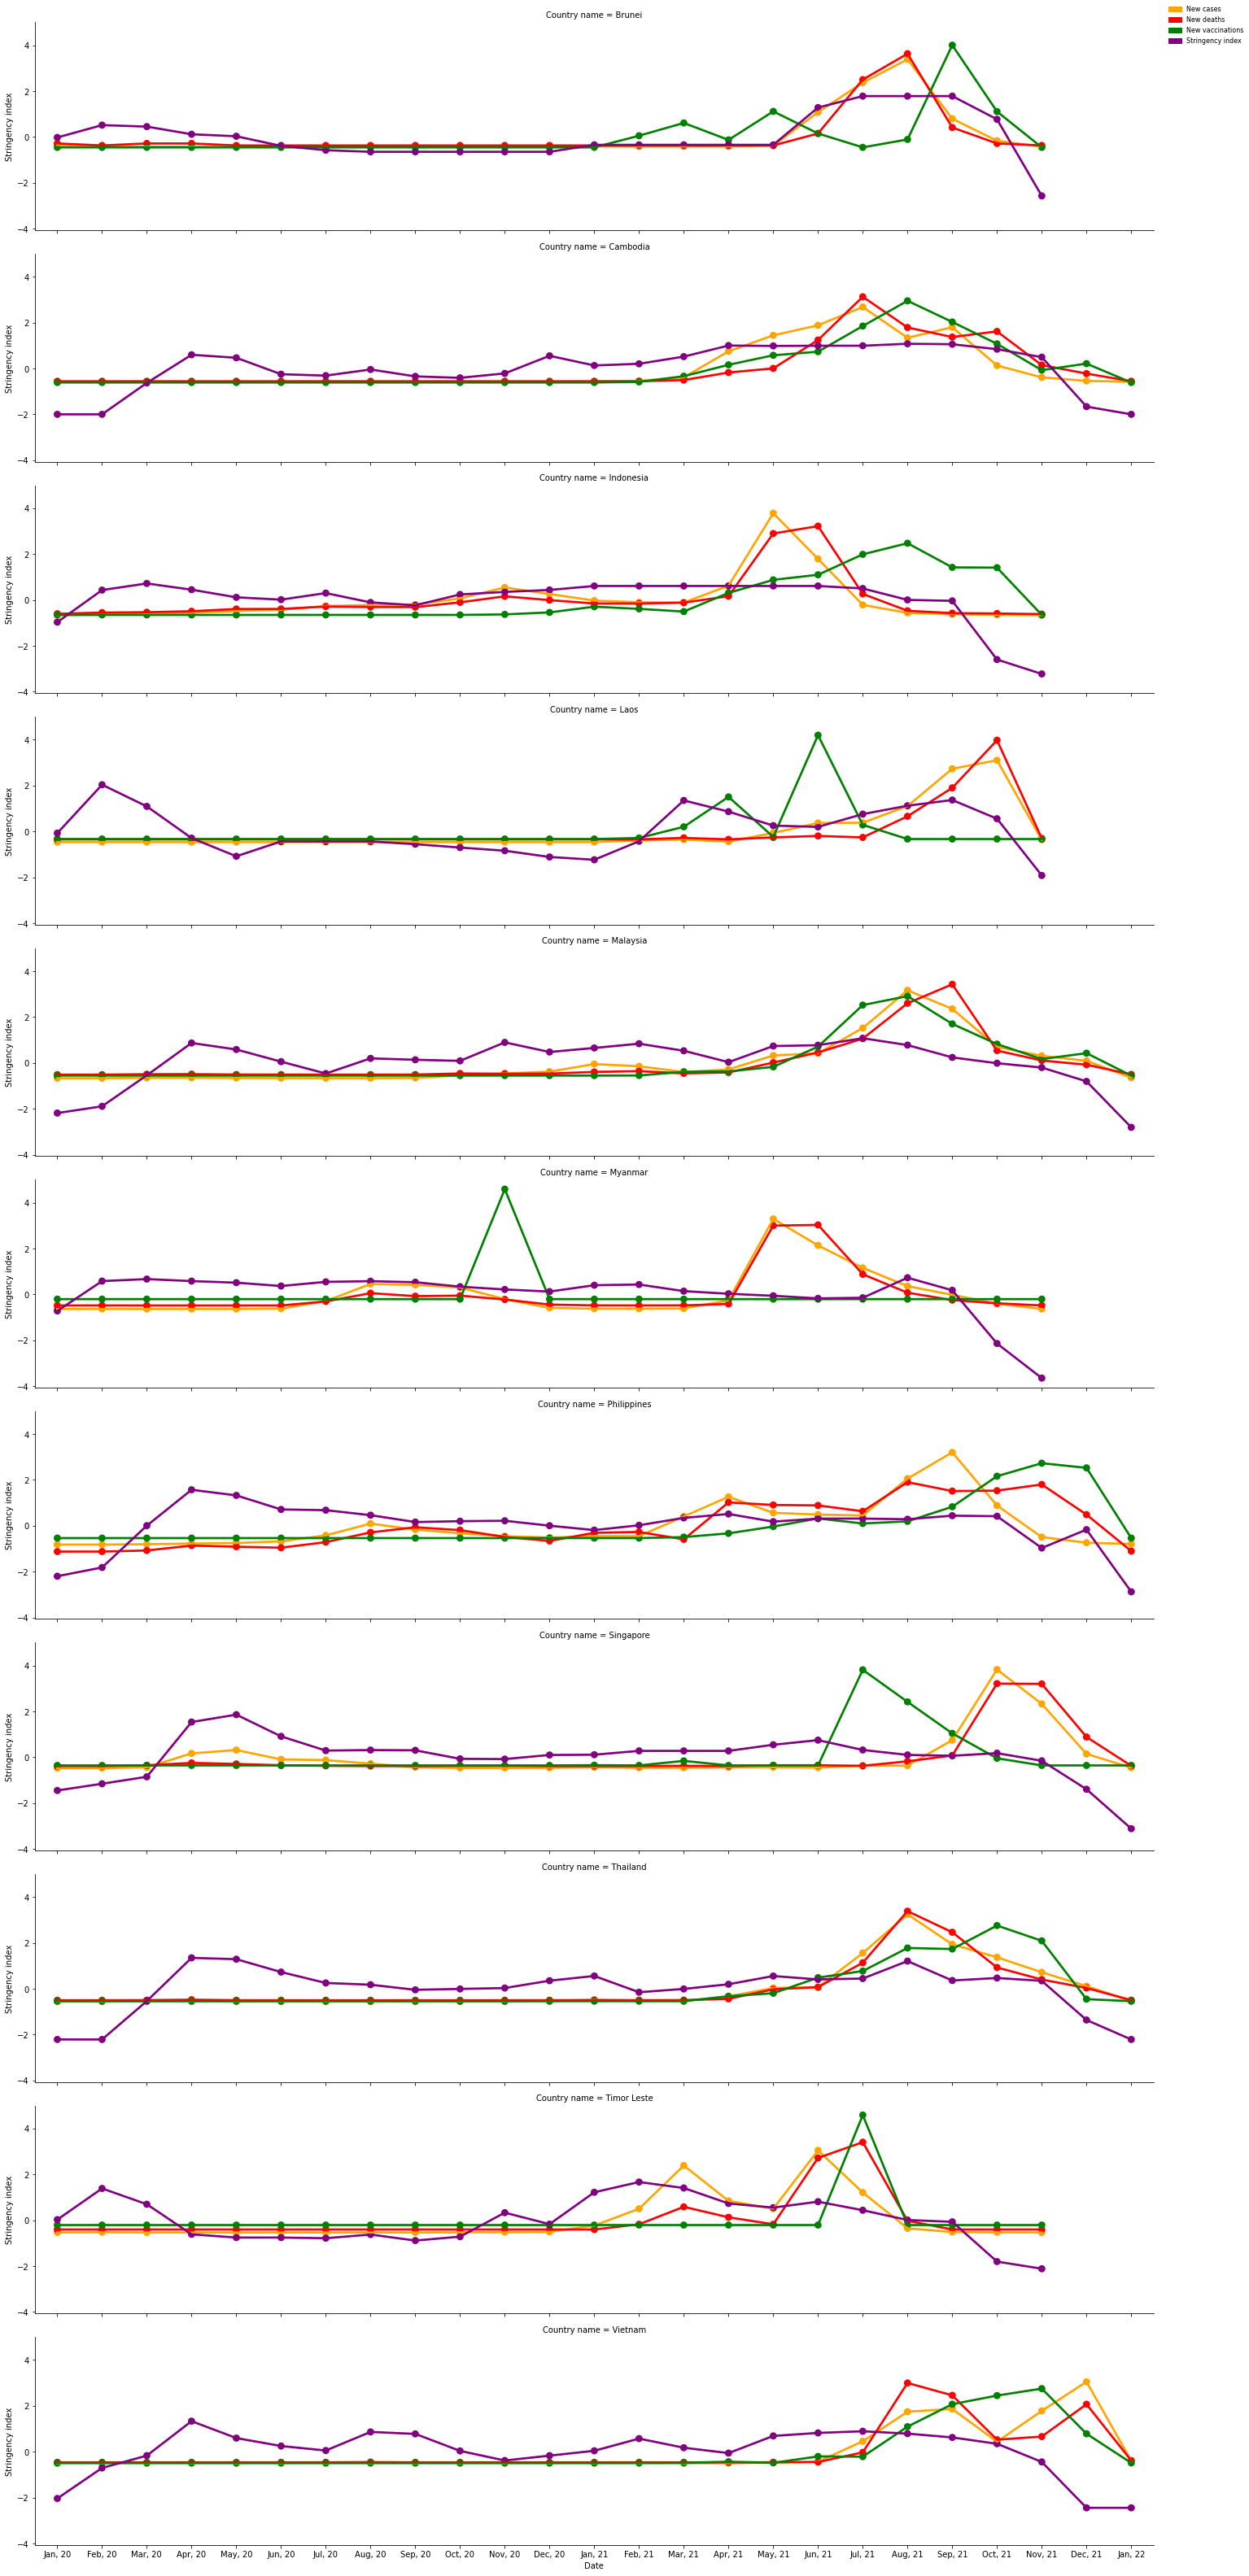

In [44]:
fig = sns.FacetGrid(df_covid_monthly_normalized, row='Country name', sharey=True, height=4, aspect=5, legend_out=True)

fig.map(sns.pointplot, "Date", "New cases", order=None, color='orange')
fig.map(sns.pointplot, "Date", "New deaths", order=None,color='red')
fig.map(sns.pointplot, "Date", "New vaccinations", order=None,color='green')
fig.map(sns.pointplot, "Date", "Stringency index", order=None, color='purple')

orange_patch = mpatches.Patch(color='orange', label='New cases')
red_patch = mpatches.Patch(color='red', label='New deaths')
green_patch = mpatches.Patch(color='green', label='New vaccinations')
purple_patch = mpatches.Patch(color='purple', label='Stringency index')

fig.add_legend(handles=[orange_patch, red_patch, green_patch, purple_patch], loc='upper right', fontsize = 8)

### Growth Rate after 1000 Cases

In [45]:
# gt_100 = df_covid[df_covid['Total cases']>100]['Country name'].unique()
temp = df_covid.copy()

# temp = temp.groupby(['Country name', 'Date'])['Total cases'].sum().reset_index()
temp = temp[temp['Total cases']>1000]
temp

min_date = temp.groupby('Country name')['Date'].min().reset_index()
min_date.columns = ['Country name', 'Min Date']


from_100th_case = pd.merge(temp, min_date, on = 'Country name')
from_100th_case['N days'] = (from_100th_case['Date'] - from_100th_case['Min Date']).dt.days

fig = px.line(from_100th_case, x = 'N days', y = 'Total cases', color = 'Country name', title = 'N days from 1000 cases', height = 600)
fig.show()


### Growth Rate after 10000 Cases

In [46]:
# gt_10000 = df_covid[df_covid['Total cases']>100000]['Country name'].unique()
temp = df_covid.copy()

# temp = temp.groupby(['Country name', 'Date'])['Total cases'].sum().reset_index()
temp = temp[temp['Total cases']>10000]
temp

min_date = temp.groupby('Country name')['Date'].min().reset_index()
min_date.columns = ['Country name', 'Min Date']


from_10000th_case = pd.merge(temp, min_date, on = 'Country name')
from_10000th_case['N days'] = (from_10000th_case['Date'] - from_10000th_case['Min Date']).dt.days

fig = px.line(from_10000th_case, x = 'N days', y = 'Total cases', color = 'Country name', title = 'N days from 10000 cases', height = 600)
fig.show()


### Growth Rate after 100000 Cases

In [47]:
# gt_100000 = df_covid[df_covid['Total cases']>10000000]['Country name'].unique()
temp = df_covid.copy()

# temp = temp.groupby(['Country name', 'Date'])['Total cases'].sum().reset_index()
temp = temp[temp['Total cases']>100000]
temp

min_date = temp.groupby('Country name')['Date'].min().reset_index()
min_date.columns = ['Country name', 'Min Date']


from_100000th_case = pd.merge(temp, min_date, on = 'Country name')
from_100000th_case['N days'] = (from_100000th_case['Date'] - from_100000th_case['Min Date']).dt.days

fig = px.line(from_100000th_case, x = 'N days', y = 'Total cases', color = 'Country name', title = 'N days from 100000 cases', height = 600)
fig.show()


## Multivariate
### Proportion total cases, deaths by country


In [48]:
plotly.express.pie(df[df['Country name'] != 'Southeast Asia'], values='Total cases', names='Country name',
               title='Total cases', color_discrete_sequence=px.colors.sequential.RdBu)

In [49]:
plotly.express.pie(df[df['Country name'] != 'Southeast Asia'], values='Total deaths', names='Country name',
               title='Total death', color_discrete_sequence=px.colors.sequential.RdBu)

### Spearman Correlation

In [50]:
correlation=df[~df['Country name'].isin(['Southeast Asia'])].corr(method='spearman')
correlation

,Total cases,Total deaths,Population,Area,GDP,Median age,Average rainfall,Average temperature
Total cases,1.000000,0.963636,0.909091,0.763636,0.845455,0.300684,0.263636,-0.123007
Total deaths,0.963636,1.000000,0.963636,0.781818,0.745455,0.255126,0.172727,-0.177677
Population,0.909091,0.963636,1.000000,0.881818,0.681818,0.218679,0.009091,-0.250570
Area,0.763636,0.781818,0.881818,1.000000,0.527273,0.113896,-0.045455,-0.423691
GDP,0.845455,0.745455,0.681818,0.527273,1.000000,0.660594,0.300000,0.154898
Median age,0.300684,0.255126,0.218679,0.113896,0.660594,1.000000,0.195900,0.390411
Average rainfall,0.263636,0.172727,0.009091,-0.045455,0.300000,0.195900,1.000000,0.346242
Average temperature,-0.123007,-0.177677,-0.250570,-0.423691,0.154898,0.390411,0.346242,1.000000


<AxesSubplot:>

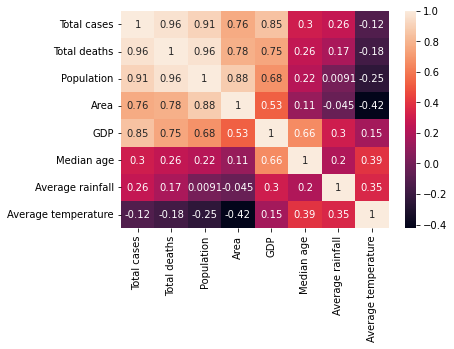

In [51]:
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

In [52]:
correlation=df[~df['Country name'].isin(['Singapore', 'Brunei', 'Southeast Asia'])].corr(method='spearman')
correlation

,Total cases,Total deaths,Population,Area,GDP,Median age,Average rainfall,Average temperature
Total cases,1.000000,0.950000,0.883333,0.733333,0.933333,0.583333,0.683333,0.376572
Total deaths,0.950000,1.000000,0.950000,0.716667,0.850000,0.600000,0.600000,0.259416
Population,0.883333,0.950000,1.000000,0.833333,0.816667,0.633333,0.433333,0.242680
Area,0.733333,0.716667,0.833333,1.000000,0.766667,0.633333,0.416667,-0.008368
GDP,0.933333,0.850000,0.816667,0.766667,1.000000,0.783333,0.516667,0.426782
Median age,0.583333,0.600000,0.633333,0.633333,0.783333,1.000000,0.116667,0.251048
Average rainfall,0.683333,0.600000,0.433333,0.416667,0.516667,0.116667,1.000000,0.092051
Average temperature,0.376572,0.259416,0.242680,-0.008368,0.426782,0.251048,0.092051,1.000000


<AxesSubplot:>

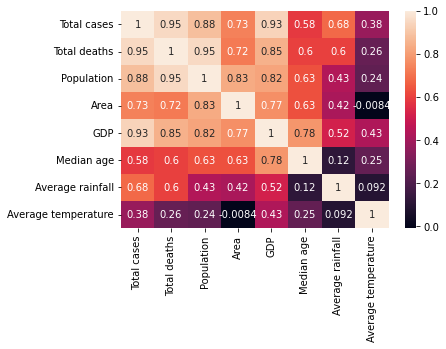

In [53]:
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

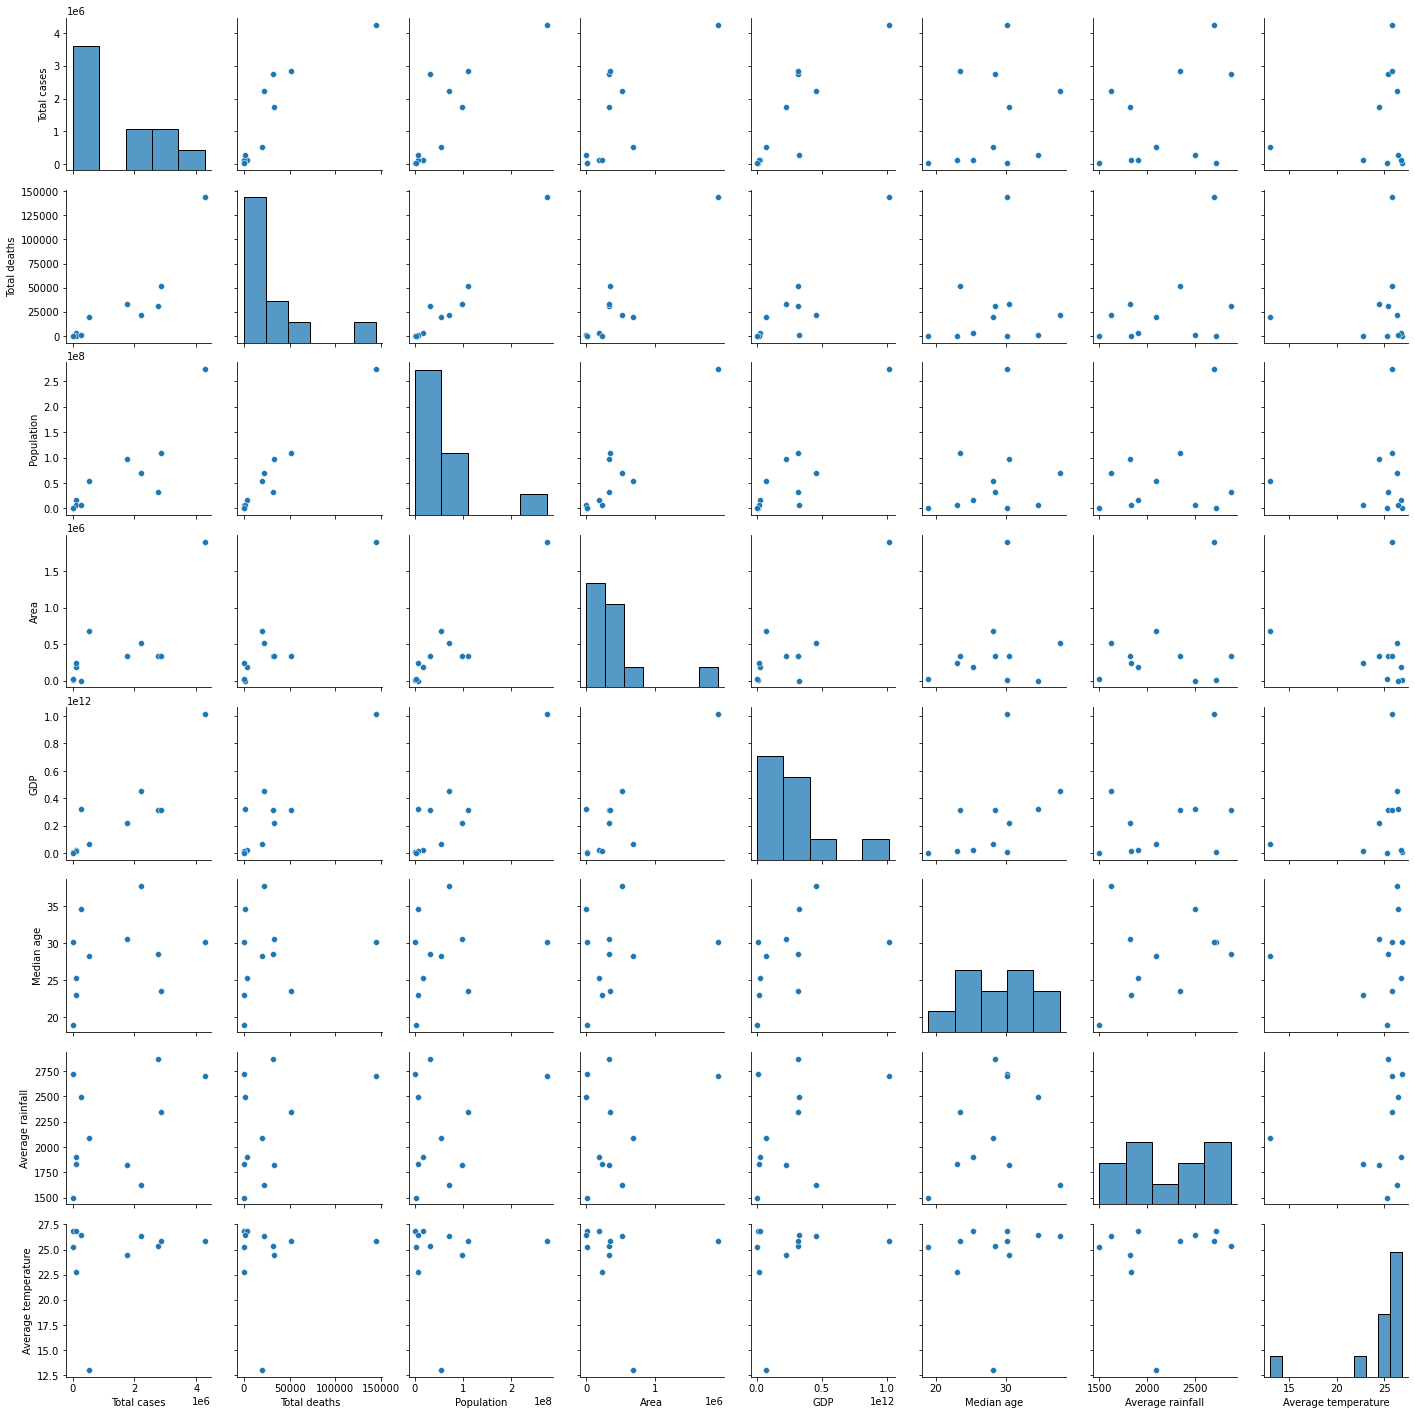

In [54]:
sns.pairplot(df[df['Country name'] != 'Southeast Asia'])

### Total cases and deaths vs Density

In [55]:
df['Density'] = df['Population']/df['Area']
df

,Country name,Total cases,Total deaths,Population,Area,GDP,Median age,Average rainfall,Average temperature,Density
0,Brunei,15470.0,98.0,437479,5765,1.212809e+10,30.200000,2722.000000,26.850000,75.885343
1,Cambodia,120507.0,3012.0,16718965,181035,2.215821e+10,25.300000,1904.000000,26.800000,92.352114
2,Indonesia,4262994.0,144096.0,273523615,1904569,1.015421e+12,30.200000,2702.000000,25.850000,143.614442
3,Laos,112083.0,374.0,7275560,236800,1.685309e+10,23.000000,1834.000000,22.800000,30.724493
4,Malaysia,2761472.0,31513.0,32365999,330803,3.147103e+11,28.500000,2875.000000,25.400000,97.840706
5,Myanmar,530946.0,19272.0,54409800,676578,6.706875e+10,28.200000,2091.000000,13.050000,80.419109
6,Philippines,2847486.0,51545.0,109581078,342353,3.135952e+11,23.500000,2348.000000,25.850000,320.082132
7,Singapore,279861.0,829.0,5850342,710,3.239072e+11,34.600000,2497.000000,26.450000,8239.918310
8,Thailand,2226442.0,21708.0,69799978,513120,4.553027e+11,37.700000,1622.000000,26.300000,136.030515
9,Timor Leste,19839.0,122.0,1318445,14874,2.954621e+09,18.900000,1500.000000,25.250000,88.640917


In [56]:
def show_correlation(df, criteria, outliers):
    palette = sns.color_palette(cc.glasbey, n_colors=len(df['Country name'])-len(outliers))

    sns.relplot(x=criteria, y='Total cases', hue="Country name", size='Total cases',
            sizes=(40, 1000), alpha=.8, palette=palette,
            height=6, data=df[~df['Country name'].isin(outliers)])
    
    sns.relplot(x=criteria, y='Total deaths', hue="Country name", size='Total deaths',
            sizes=(40, 1000), alpha=.8, palette=palette,
            height=6, data=df[~df['Country name'].isin(outliers)])

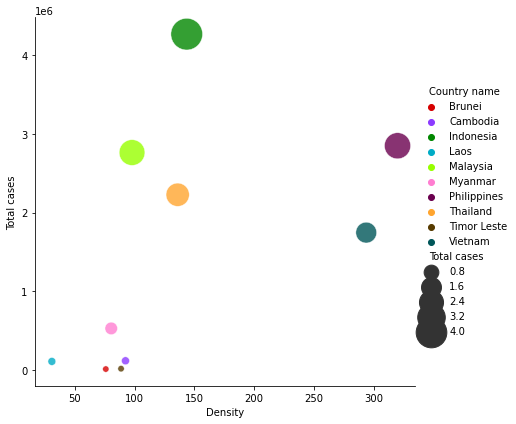

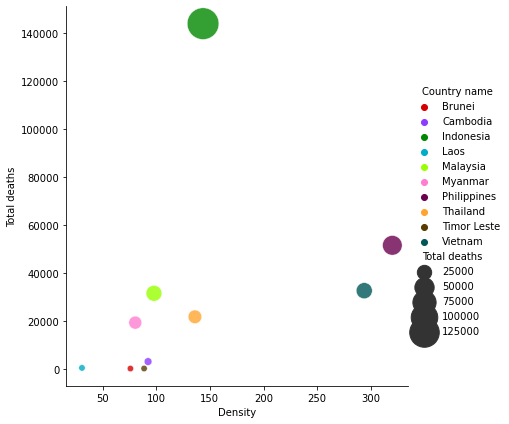

In [57]:
show_correlation(df, 'Density', ['Singapore', 'Southeast Asia'])

### Total cases and deaths vs median age

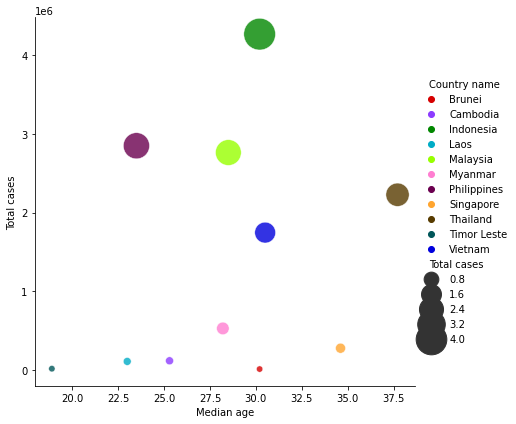

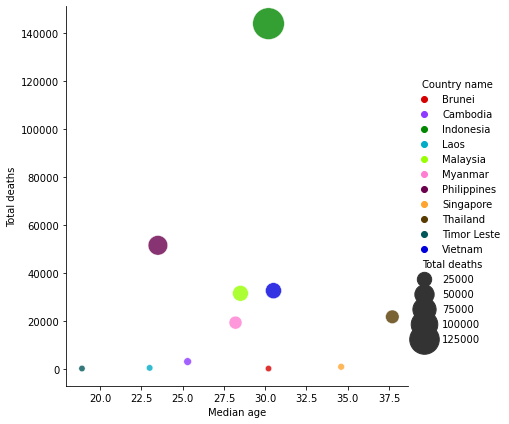

In [58]:
show_correlation(df, 'Median age', ['Southeast Asia'])

### Total cases and deaths vs average rainfall

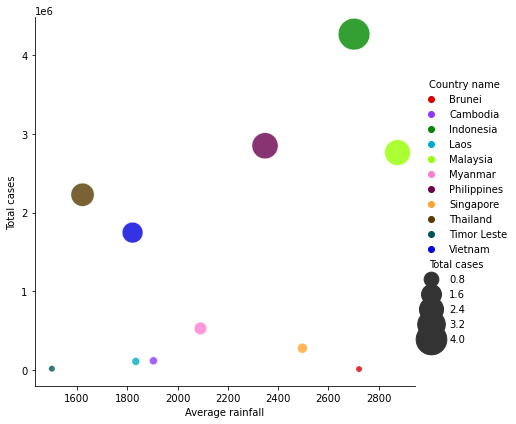

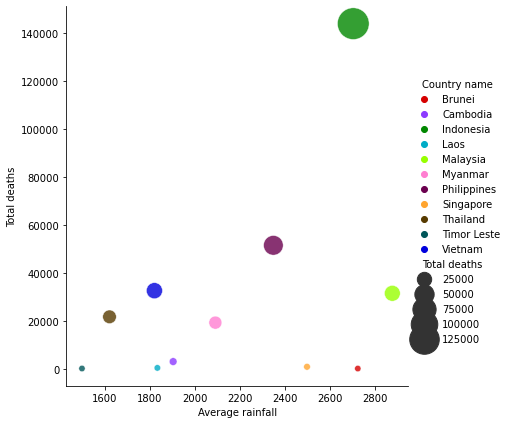

In [59]:
show_correlation(df, 'Average rainfall', ['Southeast Asia'])

### Total cases and deaths vs GDP per capita

In [60]:
temp=df.copy()
temp['GDP per capita'] = df['GDP']/df['Population']
temp

,Country name,Total cases,Total deaths,Population,Area,GDP,Median age,Average rainfall,Average temperature,Density,GDP per capita
0,Brunei,15470.0,98.0,437479,5765,1.212809e+10,30.200000,2722.000000,26.850000,75.885343,27722.676979
1,Cambodia,120507.0,3012.0,16718965,181035,2.215821e+10,25.300000,1904.000000,26.800000,92.352114,1325.333805
2,Indonesia,4262994.0,144096.0,273523615,1904569,1.015421e+12,30.200000,2702.000000,25.850000,143.614442,3712.368993
3,Laos,112083.0,374.0,7275560,236800,1.685309e+10,23.000000,1834.000000,22.800000,30.724493,2316.397292
4,Malaysia,2761472.0,31513.0,32365999,330803,3.147103e+11,28.500000,2875.000000,25.400000,97.840706,9723.483570
5,Myanmar,530946.0,19272.0,54409800,676578,6.706875e+10,28.200000,2091.000000,13.050000,80.419109,1232.659292
6,Philippines,2847486.0,51545.0,109581078,342353,3.135952e+11,23.500000,2348.000000,25.850000,320.082132,2861.764225
7,Singapore,279861.0,829.0,5850342,710,3.239072e+11,34.600000,2497.000000,26.450000,8239.918310,55365.521266
8,Thailand,2226442.0,21708.0,69799978,513120,4.553027e+11,37.700000,1622.000000,26.300000,136.030515,6522.963130
9,Timor Leste,19839.0,122.0,1318445,14874,2.954621e+09,18.900000,1500.000000,25.250000,88.640917,2240.989196


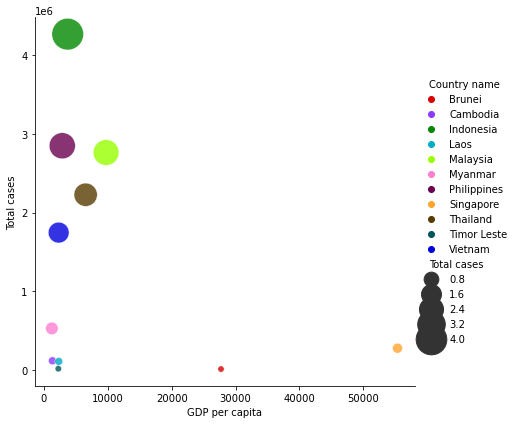

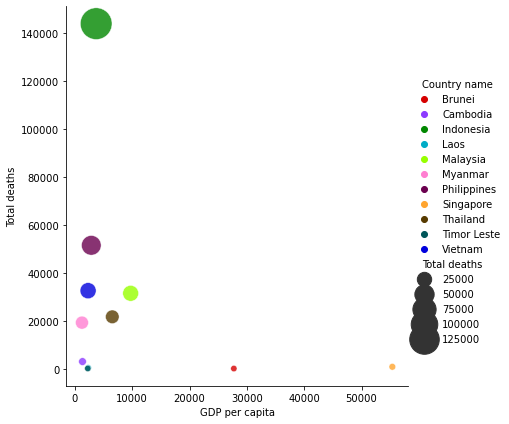

In [61]:
show_correlation(temp, 'GDP per capita', ['Southeast Asia'])

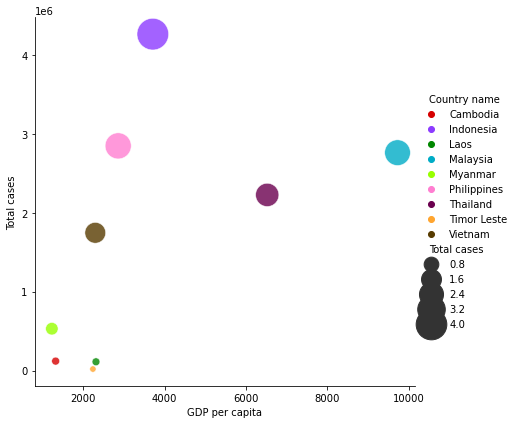

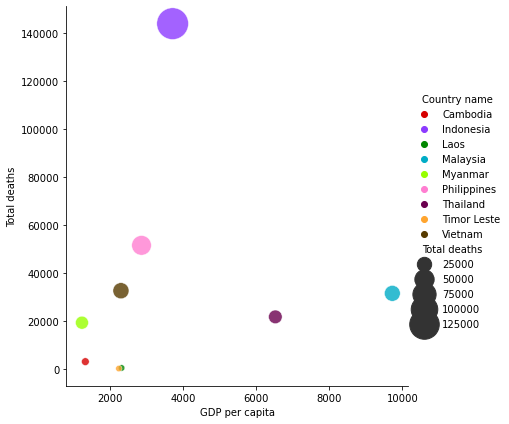

In [62]:
show_correlation(temp, 'GDP per capita', ['Singapore', 'Brunei', 'Southeast Asia'])